In [36]:
import pandas as pd #data analysis
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
import numpy as np #for arrays
import nltk #library supports tasks such as classification, stemming, tagging, parsing, semantic reasoning, and tokenization in Python.
import string #spliting int words
import scipy
%matplotlib inline




from sklearn.model_selection import train_test_split as split



import nltk
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer 
from nltk.stem import PorterStemmer, LancasterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
#from nltk.corpus import stopwords
import string
from nltk.tokenize import RegexpTokenizer
import statsmodels.api as sm
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer



import warnings
warnings.filterwarnings('ignore') 

df=pd.read_csv(r'C:\Users\Admin\Clothing_Reviews.csv')
print (df)


       Unnamed: 0  Clothing ID  Age  \
0               0          767   33   
1               1         1080   34   
2               2         1077   60   
3               3         1049   50   
4               4          847   47   
...           ...          ...  ...   
23481       23481         1104   34   
23482       23482          862   48   
23483       23483         1104   31   
23484       23484         1084   28   
23485       23485         1104   52   

                                                   Title  \
0                                                    NaN   
1                                                    NaN   
2                                Some major design flaws   
3                                       My favorite buy!   
4                                       Flattering shirt   
...                                                  ...   
23481                     Great dress for many occasions   
23482                         Wish it was made of c

In [37]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [38]:
df.shape

(23486, 11)

In [39]:
df=df.drop(['Unnamed: 0', 'Clothing ID'],axis=1)

In [40]:
df.columns

Index(['Age', 'Title', 'Review Text', 'Rating', 'Recommended IND',
       'Positive Feedback Count', 'Division Name', 'Department Name',
       'Class Name'],
      dtype='object')

In [41]:
##checking for null values


for i in df.columns[df.isna().any()].tolist():
    print(i ,'has' ,df[df[i].isna()==True].shape[0], 'Null values')

Title has 3810 Null values
Review Text has 845 Null values
Division Name has 14 Null values
Department Name has 14 Null values
Class Name has 14 Null values


In [42]:
df.dropna(axis=0,inplace=True)#drop rows which containing null values
print(df.isnull().sum())
df.shape

Age                        0
Title                      0
Review Text                0
Rating                     0
Recommended IND            0
Positive Feedback Count    0
Division Name              0
Department Name            0
Class Name                 0
dtype: int64


(19662, 9)

In [43]:
#checking duplicate values
df.duplicated().sum()

1

In [44]:
print((df['Division Name'].value_counts()/(df['Division Name'].value_counts().sum()))*100)
print((df['Department Name'].value_counts()/(df['Department Name'].value_counts().sum()))*100)
print((df['Class Name'].value_counts()/(df['Class Name'].value_counts().sum()))*100)

General           59.322551
General Petite    34.472587
Initmates          6.204862
Name: Division Name, dtype: float64
Tops        44.313905
Dresses     27.316651
Bottoms     16.193673
Intimate     7.161021
Jackets      4.470552
Trend        0.544197
Name: Department Name, dtype: float64
Dresses           27.316651
Knits             20.247177
Blouses           13.157359
Sweaters           6.194690
Pants              5.884447
Jeans              4.933374
Fine gauge         4.714678
Skirts             4.048418
Jackets            3.041400
Lounge             2.919337
Swim               1.490184
Outerwear          1.429153
Shorts             1.322348
Sleep              0.884956
Legwear            0.666260
Intimates          0.610314
Layering           0.584885
Trend              0.544197
Casual bottoms     0.005086
Chemises           0.005086
Name: Class Name, dtype: float64


In [45]:
print(df)

       Age                                              Title  \
2       60                            Some major design flaws   
3       50                                   My favorite buy!   
4       47                                   Flattering shirt   
5       49                            Not for the very petite   
6       39                               Cagrcoal shimmer fun   
...    ...                                                ...   
23481   34                     Great dress for many occasions   
23482   48                         Wish it was made of cotton   
23483   31                              Cute, but see through   
23484   28  Very cute dress, perfect for summer parties an...   
23485   52                    Please make more like this one!   

                                             Review Text  Rating  \
2      I had such high hopes for this dress and reall...       3   
3      I love, love, love this jumpsuit. it's fun, fl...       5   
4      This shi

In [46]:

df['Rating'].value_counts()

5    10858
4     4289
3     2464
2     1360
1      691
Name: Rating, dtype: int64

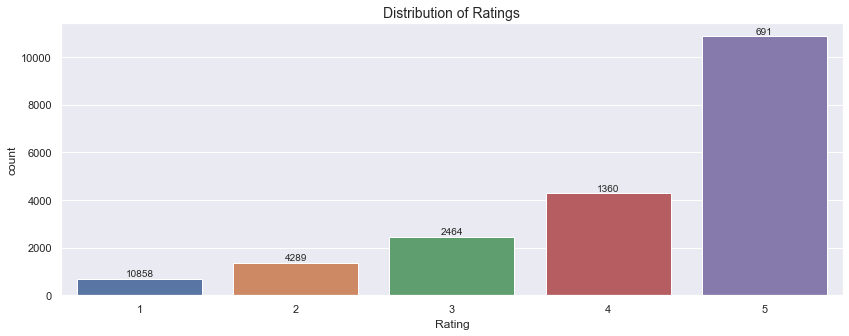

In [47]:
#  The Product Rating Distribution


plt.figure(figsize= (14,5))
ax=sns.countplot(x='Rating', data=df)
ax.set_title("Distribution of Ratings", fontsize=14)

x=df['Rating'].value_counts()

rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')
    
    #The plot shows that the dominant reviews were positive, suggesting that the e-commerce fairly satisfies its customers.

Text(0.5, 1.0, 'Counts Vs Department Name')

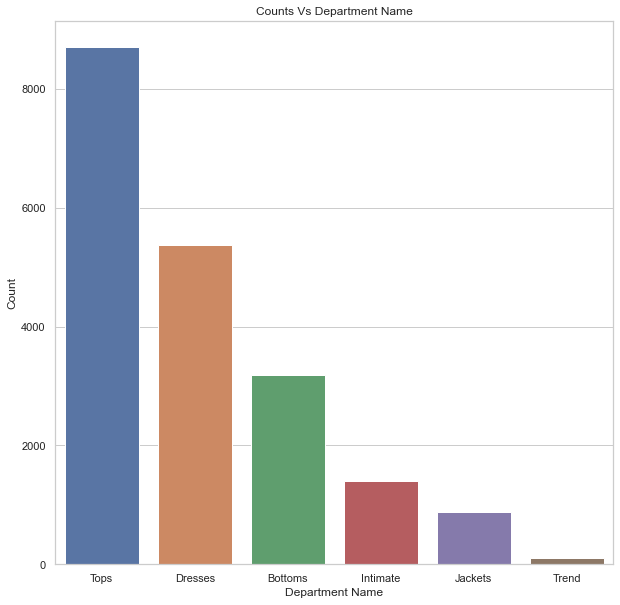

In [48]:
z = df.groupby(by=['Department Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=z['Department Name'],y=z['Class Name'], data=z)
plt.xlabel("Department Name")
plt.ylabel("Count")
plt.title("Counts Vs Department Name")

Text(0.5, 1.0, 'Counts Vs Division Name')

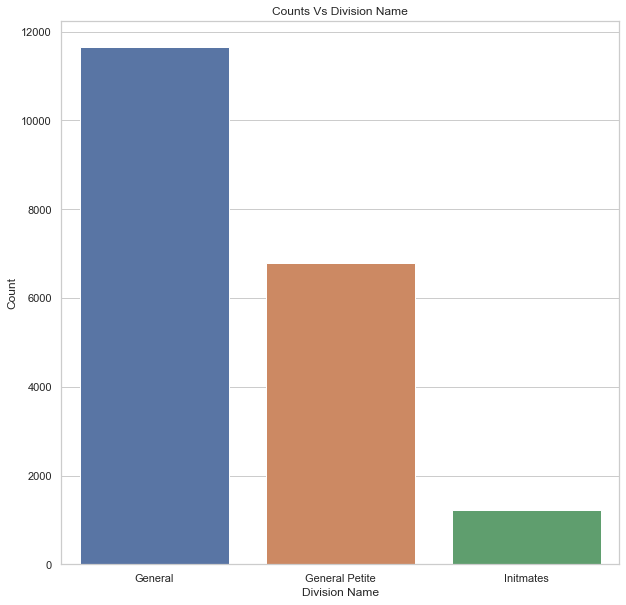

In [49]:
w = df.groupby(by=['Division Name'],as_index=False).count().sort_values(by='Class Name',ascending=False)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x=w['Division Name'],y=w['Class Name'], data=w)
plt.xlabel("Division Name")
plt.ylabel("Count")
plt.title("Counts Vs Division Name")

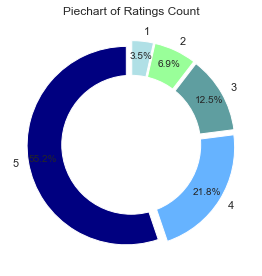

In [50]:
#UNIVARIATE ANALYSIS
#Pie chart of Ratings Counts 


import matplotlib.pyplot as plt
# Pie chart
labels = ['5', '4','3','2','1']
sizes = df['Rating'].value_counts()
#colors
colors = ['navy','#66b3ff','#5F9EA0','#99ff99','#B0E0E6']
#explsion
explode = (0.05,0.05,0.05,0.05, 0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Ratings Count') 
plt.tight_layout()
plt.show()

In [51]:
#The chart above shows the frequency of the ratings. Most people give the enterprise a rating of 5, followed by a 4. From the chart we can conclude that most customers are satisfied with the products and service.

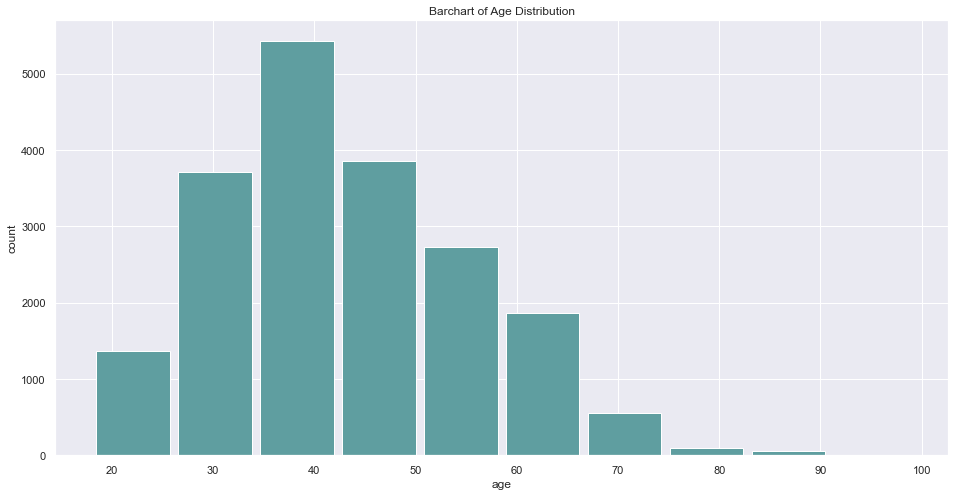

In [52]:
#BAR CHART OF AGE FREQUENCY

import matplotlib.pyplot as plt
# Pie chart
# labels = df['Age'].value_counts().values
sizes = df['Age']
bins  = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]



 

plt.hist(sizes,  histtype='bar', rwidth=0.9, color='#5F9EA0')

plt.xlabel('age')
plt.ylabel('count')
plt.title('Barchart of Age Distribution') 
plt.show()

In [53]:
%pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


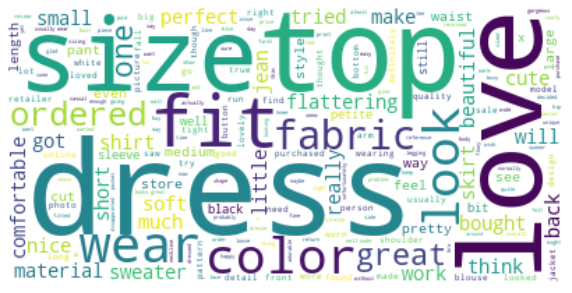

In [54]:
#Renaming data
reviews = df
# Let's build a word cloud looking at the 'Review Text' text
from wordcloud import WordCloud
from wordcloud import STOPWORDS
# Wordcloud function's input needs to be a single string of text.
# Here I'm concatenating all Summaries into a single string.
# similarly you can build for Text column
reviews_str = reviews['Review Text'].str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

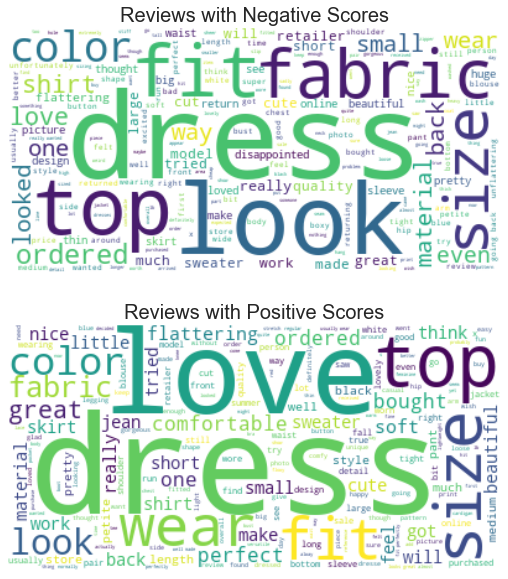

In [55]:

#Renaming dataset
reviews=df
# Now let's split the data into Negative (Score is 1 or 2) and Positive (4 or 5) Reviews.
negative_reviews = reviews[reviews['Rating'].
isin([1,2]) ]
positive_reviews = reviews[reviews['Rating'].
isin([4,5]) ]
# Transform to single string
negative_reviews_str = negative_reviews['Review Text'].str.cat()
positive_reviews_str = positive_reviews['Review Text'].str.cat()
# Create wordclouds
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)
# Plot
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

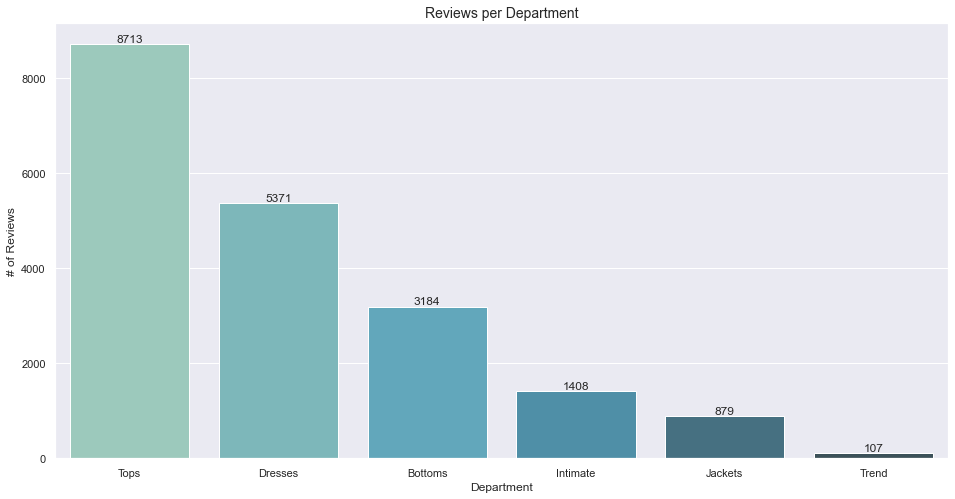

In [56]:
#BIVARIATE ANALYSIS
#A bar graph of number of reviews versus department name

# department name vs reviews
ax=sns.countplot(x='Department Name', data=df,palette="GnBu_d", order = df['Department Name'].value_counts().index)
ax.set_title("Reviews per Department", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Department", fontsize=12)
x=df['Department Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

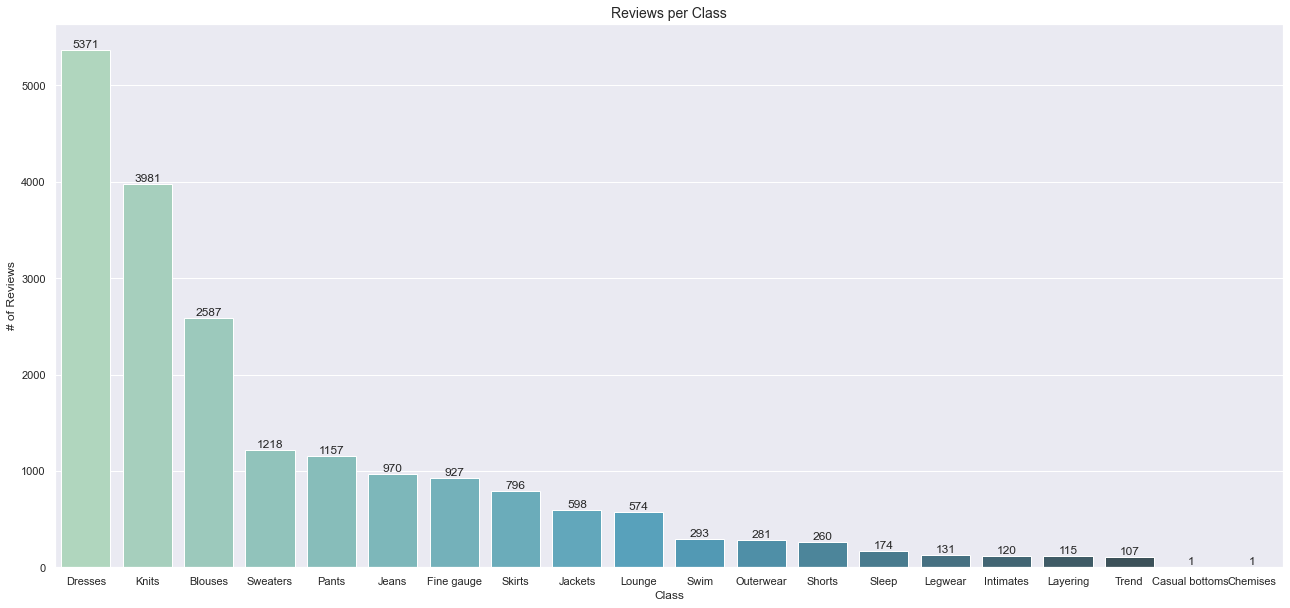

In [57]:
#A bar graph of number of reviews versus class

plt.figure(figsize= (22,10  ))
ax=sns.countplot(x='Class Name', data=df,palette="GnBu_d", order = df['Class Name'].value_counts().index)
ax.set_title("Reviews per Class", fontsize=14)
ax.set_ylabel("# of Reviews", fontsize=12)
ax.set_xlabel("Class", fontsize=12)
x=df['Class Name'].value_counts()
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

[Text(0.5, 1.0, 'Ratings per department'),
 Text(0, 0.5, 'rating count'),
 Text(0.5, 0, ' Department name')]

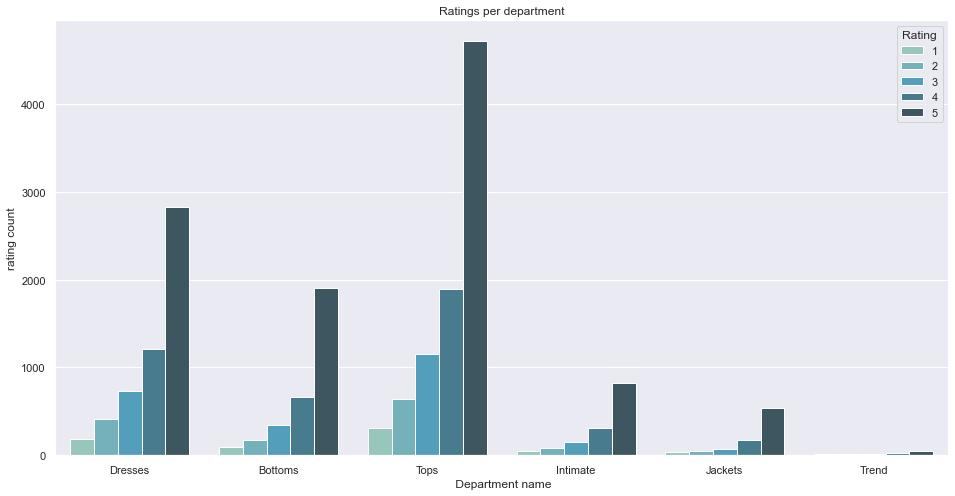

In [58]:
#A bar chart of Rating against Department.

# investigating the relationship between department name and ratings
ratings= sns.countplot('Department Name',palette="GnBu_d", hue = 'Rating', data = df)
ratings.set(title = "Ratings per department",
            ylabel =  'rating count',
        xlabel = " Department name")

In [59]:
#TEXT PROCESSING

#labeling Positive and negative sentiments
# 1,2 = negative
# 3 = neutral
# 4,5 = positive

df1 = df[['Review Text','Rating']]

df1['Rating'] = df1['Rating'].replace(1,'negative')
df1['Rating'] = df1['Rating'].replace(2,'negative')
df1['Rating'] = df1['Rating'].replace(3,'neutral')
df1['Rating'] = df1['Rating'].replace(4,'positive')
df1['Rating'] = df1['Rating'].replace(5,'positive')

df1.head(20)

,Review Text,Rating
2,I had such high hopes for this dress and reall...,neutral
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
5,"I love tracy reese dresses, but this one is no...",negative
6,I aded this in my basket at hte last mintue to...,positive
7,"I ordered this in carbon for store pick up, an...",positive
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive
10,Dress runs small esp where the zipper area run...,neutral
12,More and more i find myself reliant on the rev...,positive


In [60]:
#Dropping NEutral sentiments


df1=df1[df1['Rating'] !='neutral']
df1.head(20)

,Review Text,Rating
3,"I love, love, love this jumpsuit. it's fun, fl...",positive
4,This shirt is very flattering to all due to th...,positive
5,"I love tracy reese dresses, but this one is no...",negative
6,I aded this in my basket at hte last mintue to...,positive
7,"I ordered this in carbon for store pick up, an...",positive
8,I love this dress. i usually get an xs but it ...,positive
9,"I'm 5""5' and 125 lbs. i ordered the s petite t...",positive
12,More and more i find myself reliant on the rev...,positive
13,Bought the black xs to go under the larkspur m...,positive
15,I took these out of the package and wanted the...,positive


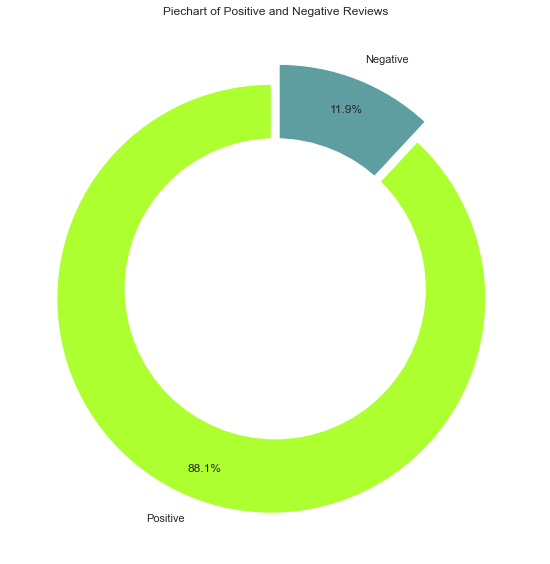

In [61]:
# Let’s see how the overall sentiment is using the sentiment we generated.


import matplotlib.pyplot as plt
# Pie chart
labels = ['Positive','Negative' ]
sizes = df1['Rating'].value_counts()
#colors
colors = ['#ADFF2F','#5F9EA0']
#explsion
explode = (0.05,0.05)
 
plt.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
#Adjusts chart size
sns.set(rc={'figure.figsize':(16, 8)})
plt.title('Piechart of Positive and Negative Reviews') 
plt.tight_layout()
plt.show()

In [62]:
reviewsDf = df[["Rating","Review Text"]]


In [63]:
reviewsDf.head()

,Rating,Review Text
2,3,I had such high hopes for this dress and reall...
3,5,"I love, love, love this jumpsuit. it's fun, fl..."
4,5,This shirt is very flattering to all due to th...
5,2,"I love tracy reese dresses, but this one is no..."
6,5,I aded this in my basket at hte last mintue to...


In [65]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [66]:

#Removing stop words.
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk

from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
%pip install nltk --upgrade
nltk.download('wordnet')

sw = set(stopwords.words('english'))

def preproc(data):
    #converting all to lowercase
    data= data.lower() 
    #Tokenize
    words = RegexpTokenizer(r'[a-z]+').tokenize(data)
    #Deleting stopwords
    words = [w for w in words if not w in sw]
    
    #Lemmatizing
    for pos in [wordnet.NOUN, wordnet.VERB, wordnet.ADJ, wordnet.ADV]:
        words = [WordNetLemmatizer().lemmatize(x, pos) for x in words]
    return " ".join(words)

Requirement already up-to-date: nltk in c:\users\admin\anaconda3\lib\site-packages (3.6.3)
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [67]:

reviewsDf['New Text'] = reviewsDf['Review Text'].apply(preproc)

In [68]:
reviewsDf.head()

,Rating,Review Text,New Text
2,3,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...
3,5,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...
4,5,This shirt is very flattering to all due to th...,shirt flat due adjustable front tie perfect le...
5,2,"I love tracy reese dresses, but this one is no...",love tracy reese dress one petite foot tall us...
6,5,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...


In [69]:
def polarity (row):
  if row['Rating'] >= 4:
    return 'Positive'
  if row['Rating'] == 3:
    return 'Neutral'
  if row['Rating'] <= 2:
    return 'Negative'

reviewsDf['Class'] = reviewsDf.apply(lambda row: polarity(row), axis=1)

In [70]:
reviewsDf.head()

,Rating,Review Text,New Text,Class
2,3,I had such high hopes for this dress and reall...,high hope dress really want work initially ord...,Neutral
3,5,"I love, love, love this jumpsuit. it's fun, fl...",love love love jumpsuit fun flirty fabulous ev...,Positive
4,5,This shirt is very flattering to all due to th...,shirt flat due adjustable front tie perfect le...,Positive
5,2,"I love tracy reese dresses, but this one is no...",love tracy reese dress one petite foot tall us...,Negative
6,5,I aded this in my basket at hte last mintue to...,aded basket hte last mintue see would look lik...,Positive


In [71]:
text, classe = reviewsDf["New Text"], reviewsDf["Class"]

In [72]:

text

2        high hope dress really want work initially ord...
3        love love love jumpsuit fun flirty fabulous ev...
4        shirt flat due adjustable front tie perfect le...
5        love tracy reese dress one petite foot tall us...
6        aded basket hte last mintue see would look lik...
                               ...                        
23481    happy snag dress great price easy slip flat cu...
23482    remind maternity clothe soft stretchy shiny ma...
23483    fit well top see never would work glad able tr...
23484    buy dress wed summer cute unfortunately fit pe...
23485    dress lovely platinum feminine fit perfectly e...
Name: New Text, Length: 19662, dtype: object

In [73]:
classe

2         Neutral
3        Positive
4        Positive
5        Negative
6        Positive
           ...   
23481    Positive
23482     Neutral
23483     Neutral
23484     Neutral
23485    Positive
Name: Class, Length: 19662, dtype: object

In [74]:
train_text = text[:16980]
test_text = text[16981:22640]
train_classe = classe[:16980]
test_classe = classe[16981:22640]

In [75]:
#Feature extraction

from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(encoding='latin-1')
X_train_counts = count_vect.fit_transform(train_text)
X_train_counts.shape

(16980, 9001)

In [76]:
count_vect.vocabulary_.get('dress')

2351

In [77]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=True)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(16980, 9001)

In [78]:

from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, train_classe)

In [79]:

from sklearn.metrics import accuracy_score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = clf.predict(X_test_tfidf)
gaussian_acc = accuracy_score(test_classe, predito)
print(gaussian_acc)

0.7788138754196196


In [80]:
from sklearn.ensemble import RandomForestClassifier

ran = RandomForestClassifier(n_estimators=50)
ran.fit(X_train_tfidf, train_classe)

RandomForestClassifier(n_estimators=50)

In [81]:
#Accuracy score
X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = ran.predict(X_test_tfidf)
ran_acc = accuracy_score(test_classe, predito)
print(ran_acc)

0.7870197687430064


In [86]:
print(train_classe)

2         Neutral
3        Positive
4        Positive
5        Negative
6        Positive
           ...   
20277    Positive
20278    Positive
20279    Positive
20280    Positive
20281    Positive
Name: Class, Length: 16980, dtype: object


In [87]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train_tfidf, train_classe)

SVC()

In [88]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = svm.predict(X_test_tfidf)
svm_acc = accuracy_score(test_classe, predito)
print(svm_acc)

0.824692279000373


In [89]:
print(predito)

['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [90]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train_tfidf, train_classe)

LogisticRegression()

In [91]:
#Accuracy score

X_test_counts = count_vect.transform(test_text)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)
predito = lr.predict(X_test_tfidf)
lr_acc = accuracy_score(test_classe, predito)
print(lr_acc)

0.8235732935471839


In [92]:
print(predito)

['Positive' 'Positive' 'Positive' ... 'Positive' 'Positive' 'Positive']


In [93]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes'],
    'Score': [svm_acc, lr_acc, 
              ran_acc, gaussian_acc]})
models.sort_values(by='Score', ascending=False)

,Model,Score
0,Support Vector Machines,0.824692
1,Logistic Regression,0.823573
2,Random Forest,0.787020
3,Naive Bayes,0.778814
